## Programming Exercise 3: Multi-class Classification and Neural Networks

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
from scipy.special import expit #Vectorized sigmoid function

### 1 Multi-class Classification

#### 1.1 Dataset

In [13]:
datafile = 'data/ex3data1.mat'
mat = scipy.io.loadmat( datafile )
X, y = mat['X'], mat['y']
#Insert a column of 1's to X as usual
X = np.insert(X,0,1,axis=1)
print("'y' shape: %s. Unique elements in y: %s"%(mat['y'].shape,np.unique(mat['y'])))
print("'X' shape: %s. X[0] shape: %s"%(X.shape,X[0].shape))
#X is 5000 images. Each image is a row. Each image has 400 pixels unrolled (20x20)
#y is a classification for each image. 1-10, where "10" is the handwritten "0"

'y' shape: (5000, 1). Unique elements in y: [ 1  2  3  4  5  6  7  8  9 10]
'X' shape: (5000, 401). X[0] shape: (401,)


#### 1.2 Visualizing the data

In [7]:
nrows, ncols = 10, 10
indices_to_display = random.sample(range(X.shape[0]), nrows*ncols)
len(indices_to_display)

100

In [16]:
X[1]

array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.22856793e-04, -9.15576210e-04,
       -2.53532265e-02, -

In [ ]:
tmp = getDatumImg(X[1])
tmp.shape

In [23]:
width, height = 20, 20
nrows, ncols = 10, 10
big_picture = np.zeros((height*nrows,width*ncols))
big_picture.shape
big_picture[0:2,0:2]

array([[0., 0.],
       [0., 0.]])

In [28]:
from PIL import Image

def getDatumImg(row):
    """
    Function that is handed a single np array with shape 1x400,
    crates an image object from it, and returns it
    """
    width, height = 20, 20
    #print(row[1:])
    square = row[1:].reshape(width,height)
    #print(square)
    return square.T
    
def displayData(indices_to_display = None):
    """
    Function that picks 100 random rows from X, creates a 20x20 image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 20, 20
    nrows, ncols = 10, 10
    if not indices_to_display:
        # Randomly pick 100 rows in X, which stands for 100 numbers picture
        indices_to_display = random.sample(range(X.shape[0]), nrows*ncols)
        
    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getDatumImg(X[idx]) # 20*20 small picture
        big_picture[
            (irow * height) : (irow * height + iimg.shape[0]),
            (icol * width) : (icol * width + iimg.shape[1])
        ] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    #img = Image.fromarray( big_picture )
    #img.save("E:/Temp/tmp.jpeg")
    #plt.imshow(img,cmap = cm.Greys_r)
    plt.imshow(big_picture,cmap = cm.Greys_r)

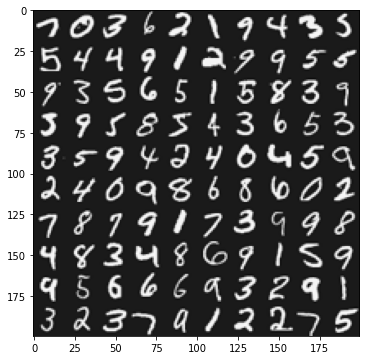

In [29]:
displayData()

#### 1.3 Vectorizing Logistic Regression

In [30]:
#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))  # (5000, 401) dot (401, 1)

#A more simply written cost function than last week, inspired by subokita:
def computeCost(mytheta,myX,myy,mylambda = 0.):
    m = myX.shape[0] #5000
    myh = h(mytheta,myX) #shape: (5000,1)
    term1 = np.log( myh ).dot( -myy.T ) #shape: (5000,5000)
    term2 = np.log( 1.0 - myh ).dot( 1 - myy.T ) #shape: (5000,5000)
    left_hand = (term1 - term2) / m #shape: (5000,5000)
    right_hand = mytheta.T.dot( mytheta ) * mylambda / (2*m) #shape: (1,1)
    return left_hand + right_hand #shape: (5000,5000)

In [43]:
# My correction
def computeCost(mytheta,myX,myy,mylambda = 0.):
    m = myX.shape[0] #5000
    myh = h(mytheta,myX) #shape: (5000,1)
    term1 = np.log( myh )*( -myy ) #shape: (5000,1)
    term2 = np.log( 1.0 - myh ) * ( 1 - myy ) #shape: (5000,1)
    left_hand = np.sum(term1 - term2) / m #shape: (1,1)
    right_hand = mytheta.T.dot( mytheta ) * mylambda / (2*m) #shape: (1,1)
    return left_hand + right_hand #shape: (1,1)

#### 1.4 One-vs-all Classification

In [31]:
#An alternative to OCTAVE's 'fmincg' we'll use some scipy.optimize function, "fmin_cg"
#This is more efficient with large number of parameters.
#In the previous homework, I didn't have to compute the cost gradient because
#the scipy.optimize function did it for me with some kind of interpolation...
#However, fmin_cg needs the gradient handed do it, so I'll implement that here
def costGradient(mytheta,myX,myy,mylambda = 0.):
    m = myX.shape[0]
    #Tranpose y here because it makes the units work out in dot products later
    #(with the way I've written them, anyway)
    beta = h(mytheta,myX)-myy.T #shape: (5000,5000)

    #regularization skips the first element in theta
    regterm = mytheta[1:]*(mylambda/m) #shape: (400,1)

    grad = (1./m)*np.dot(myX.T,beta) #shape: (401, 5000)
    #regularization skips the first element in theta
    grad[1:] = grad[1:] + regterm
    return grad #shape: (401, 5000)

In [48]:
initial_theta = np.zeros((X.shape[1],1))
print(initial_theta.shape)
print(initial_theta[1:].shape)
print(initial_theta[1:].reshape(-1).shape)

(401, 1)
(400, 1)
(400,)


In [46]:
# My correction
def costGradient(mytheta,myX,myy,mylambda = 0.):
    m = myX.shape[0]
    #Tranpose y here because it makes the units work out in dot products later
    #(with the way I've written them, anyway)
    beta = h(mytheta,myX)-myy #shape: (5000,1)

    #regularization skips the first element in theta
    regterm = mytheta[1:]*(mylambda/m) #shape: (400,1)

    grad = (1./m)*np.dot(myX.T,beta) #shape: (401, 1)
    #regularization skips the first element in theta
    grad[1:] = grad[1:] + regterm
    return grad #shape: (401, 1)

In [47]:
from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin_cg(computeCost, fprime=costGradient, x0=mytheta, \
                              args=(myX, myy, mylambda), maxiter=50, disp=False,\
                              full_output=True)
    return result[0], result[1]

In [49]:
#Note: I spent a LONG time trying to optimize everything. Initially training 10 classes
#took about 5 minutes. Now I've got it down to taking ~5 seconds total!
def buildTheta():
    """
    Function that determines an optimized theta for each class
    and returns a Theta function where each row corresponds
    to the learned logistic regression params for one class
    """
    mylambda = 0.
    initial_theta = np.zeros((X.shape[1],1)).reshape(-1)
    Theta = np.zeros((10,X.shape[1]))
    for i in range(10):
        # 0->10, 1->1, 2->2, .... , 9->9
        iclass = i if i else 10 #class "10" corresponds to handwritten zero
        print("Optimizing for handwritten number %d..."%i)
        # y.shape: (5000, 1)
        # Convert to bitwise array
        logic_Y = np.array([1 if x == iclass else 0 for x in y])#.reshape((X.shape[0],1))
        itheta, imincost = optimizeTheta(initial_theta,X,logic_Y,mylambda)
        Theta[i,:] = itheta
    print("Done!")
    return Theta

In [50]:
Theta = buildTheta()

Optimizing for handwritten number 0...
Optimizing for handwritten number 1...
Optimizing for handwritten number 2...
Optimizing for handwritten number 3...
Optimizing for handwritten number 4...
Optimizing for handwritten number 5...
Optimizing for handwritten number 6...
Optimizing for handwritten number 7...
Optimizing for handwritten number 8...
Optimizing for handwritten number 9...
Done!


In [51]:
def predictOneVsAll(myTheta,myrow):
    """
    Function that computes a hypothesis for an individual image (row in X)
    and returns the predicted integer corresponding to the handwritten image
    """
    classes = [10] + list(range(1,10))
    hypots  = [0]*len(classes)
    #Compute a hypothesis for each possible outcome
    #Choose the maximum hypothesis to find result
    for i in range(len(classes)):
        hypots[i] = h(myTheta[i],myrow)
    return classes[np.argmax(np.array(hypots))]    

In [52]:
# "You should see that the training set accuracy is about 94.9%"
n_correct, n_total = 0., 0.
incorrect_indices = []
for irow in range(X.shape[0]):
    n_total += 1
    if predictOneVsAll(Theta,X[irow]) == y[irow]: 
        n_correct += 1
    else: incorrect_indices.append(irow)
print("Training set accuracy: %0.1f%%"%(100*(n_correct/n_total)))

Training set accuracy: 95.3%


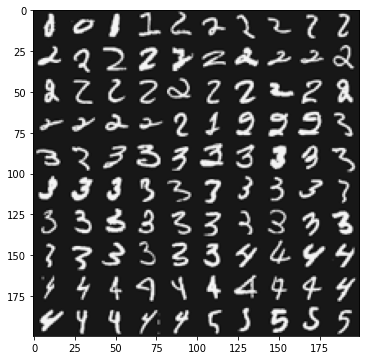

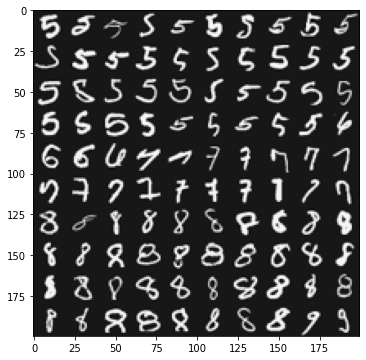

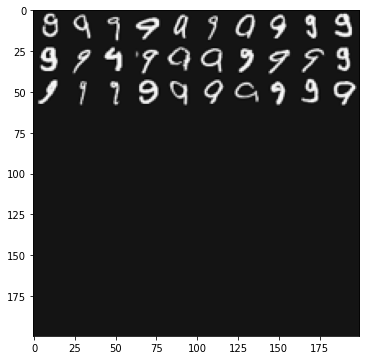

In [42]:
#Let's have a look at the ones we get wrong:
displayData(incorrect_indices[:100])
displayData(incorrect_indices[100:200])
displayData(incorrect_indices[200:300])

### 2 Neural Networks

#### 2.1 Model representation

In [53]:
#You have been provided with a set of network parameters (Θ(1),Θ(2)) 
#already trained by us. These are stored in ex3weights.mat
datafile = 'data/ex3weights.mat'
mat = scipy.io.loadmat( datafile )
Theta1, Theta2 = mat['Theta1'], mat['Theta2']
print("Theta1 has shape:",Theta1.shape)
print("Theta2 has shape:",Theta2.shape)

Theta1 has shape: (25, 401)
Theta2 has shape: (10, 26)


#### 2.2 Feedforward Propagation

In [14]:
def propagateForward(row,Thetas):
    """
    Function that given a list of Thetas, propagates the
    Row of features forwards, assuming the features already
    include the bias unit in the input layer, and the 
    Thetas need the bias unit added to features between each layer
    """
    features = row # row: (1, 401)
    for i in range(len(Thetas)):
        # for the i'th layer
        Theta = Thetas[i]
        z = Theta.dot(features)
        a = expit(z)
        if i == len(Thetas)-1:
            return a
        a = np.insert(a,0,1) #Add the bias unit
        features = a

def predictNN(row,Thetas):
    """
    Function that takes a row of features, propagates them through the
    NN, and returns the predicted integer that was hand written
    """
    classes = range(1,10) + [10]
    output = propagateForward(row,Thetas)
    return classes[np.argmax(np.array(output))]

In [56]:
"""
My solution
"""

def propagateForward(row,Thetas):
    """
    Function that given a list of Thetas, propagates the
    Row of features forwards, assuming the features already
    include the bias unit in the input layer, and the 
    Thetas need the bias unit added to features between each layer
    """
    features = row # 1st layer: (1, 401)
    for i in range(len(Thetas)):
        # for the i'th layer
        Theta = Thetas[i]
        z = features.dot(Theta.T)  # 1st layer: (1, 25), 2nd layer: (1, 10)
        a = expit(z) # 1st layer: (1, 25), 2nd layer: (1, 10)
        if i == len(Thetas)-1: # for the last layer
            return a
        a = np.insert(a,0,1) #Add the bias unit
        # generate features for the next layer
        features = a # 1st layer: (1, 26)

def predictNN(row,Thetas):
    """
    Function that takes a row of features, propagates them through the
    NN, and returns the predicted integer that was hand written
    """
    classes = list(range(1,10)) + [10]
    output = propagateForward(row,Thetas)  # (1, 10)
    return classes[np.argmax(np.array(output))]

In [57]:
# "You should see that the accuracy is about 97.5%"
myThetas = [ Theta1, Theta2 ]  # Theta1 for 1st layer, and Theta2 for 2nd layer
n_correct, n_total = 0., 0.
incorrect_indices = []
#Loop over all of the rows in X (all of the handwritten images)
#and predict what digit is written. Check if it's correct, and
#compute an efficiency.
for irow in range(X.shape[0]): # X: (5000, 401)
    n_total += 1
    if predictNN(X[irow],myThetas) == int(y[irow]): 
        n_correct += 1
    else:
        incorrect_indices.append(irow)
print("Training set accuracy: %0.1f%%"%(100*(n_correct/n_total)))

Training set accuracy: 97.5%


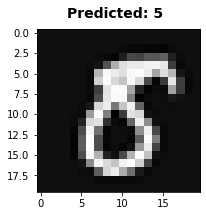

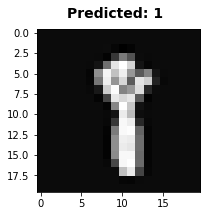

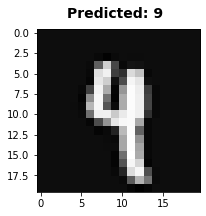

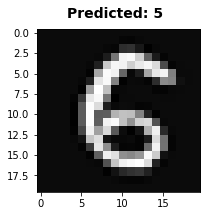

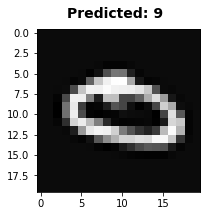

In [58]:
#Pick some of the images we got WRONG and look at them, just to see
for x in range(5):
    i = random.choice(incorrect_indices)
    fig = plt.figure(figsize=(3,3))
    #img = scipy.misc.toimage( getDatumImg(X[i]) )
    plt.imshow(getDatumImg(X[i]) ,cmap = cm.Greys_r)
    predicted_val = predictNN(X[i],myThetas)
    predicted_val = 0 if predicted_val == 10 else predicted_val
    fig.suptitle('Predicted: %d'%predicted_val, fontsize=14, fontweight='bold')